In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tikzplotlib

1. Experiment: measure resistance of different resistors

In [181]:
experiment1 = pd.read_csv("../data/experiment1_data.csv")

current = experiment1['current'].values
time = experiment1['time'].values

n = 50

perOscillation = time/n

normalized = (1/perOscillation)**2

experiment1['Frequency'] = perOscillation
experiment1['Frequency^2'] = normalized

experiment1.to_latex("./result.tex", index=False, label='date_raw', position='H')

In [199]:


slope, intercept = np.polyfit(current, normalized, 1)
p = np.poly1d([slope, intercept])

error = normalized - p(current)
std = np.std(error)

slope_frame = pd.DataFrame()

slope_frame['Slope'] = [slope]
slope_frame['Intercept'] = [intercept]
slope_frame['Standard deviation'] = [std]
slope_frame['Standard deviation(%)'] = [(std/slope)*100]


slope_frame.to_latex("./slope.tex", index=False, label='slope', position='H')



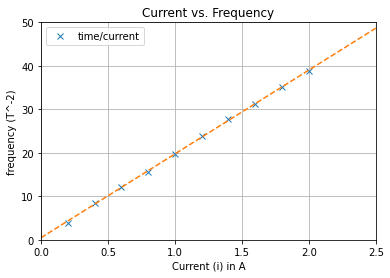

In [192]:
fig, ax = plt.subplots()


ax.plot(current, normalized, label="time/current", marker='x', ls='none')

xrange = [0, 2.5]

ax.plot(xrange ,p(xrange),"--")

plt.legend()

ax.set(xlabel='Current (i) in A', ylabel='frequency (T^-2)',
    title='Current vs. Frequency')

ax.set_xlim(xrange)
ax.set_ylim(0, 50)

ax.grid()

tikzplotlib.save("time_vs_current.tex")

In [ ]:
# magnetic_constant = 4*math.pi*1e-7
# coils = 130


k = 7.45e-4
expected_magnetic_field_earth = 16.5e-6

dimensions = pd.read_csv("../data/magnet_dimensions.csv")

l = dimensions["l"].values
a = dimensions["a"].values
m = dimensions["m"].values

inertia = np.mean(m*(l**2+a**2)/12)

dipoleMoment = gradient*5*math.pi**2*inertia/k

magnetic_field_measured = k*intercept/slope

ratio = magnetic_field_measured/expected_magnetic_field_earth

consts = pd.DataFrame()
consts['Helmholz coil constant'] = [k]
consts['Magnet length (l)'] = np.mean(l)
consts['Magnet width (w)'] = np.mean(a)
consts['Magnet mass (m)'] = np.mean(m)

consts.to_latex('further_const.tex', index=False, label='further_consts', position='H')

final_res = pd.DataFrame()
final_res['Intertia (I)'] = [inertia]
final_res['Dipole Moment'] = [dipoleMoment]
final_res['Earth magnetic field (expected)'] = [expected_magnetic_field_earth]
final_res['Earth magnetic field (measured)'] = [magnetic_field_measured]
final_res['Error'] = [ratio]


final_res.to_latex('final_result.tex', index=False, label='end_result', position='H')


